# Loading in Residual Count Dataset

- each value shows gene expression via RNA sequencing

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/RNAseqHarm/MSBB_Residualized_counts_(diagnosis-sex-age-death).tsv', delimiter="\t")
df1 = pd.read_csv('data/RNAseqHarm/RNAseq_Harmonization_MSBB_combined_metadata.csv')

In [6]:
df.head(10)

,feature,BM_22_213,BM_22_222,BM_22_229,BM_22_230,BM_22_231,BM_22_234,BM_22_238,BM_10_546,BM_10_548,...,hB_RNA_8615_B82C014,hB_RNA_8675_L43C014,hB_RNA_9115_B82C014,hB_RNA_9166_L43C014,hB_RNA_9178_L43C014,hB_RNA_9180_L43C014,hB_RNA_9187_L43C014,hB_RNA_9189_E007C014,hB_RNA_9191_L43C014,hB_RNA_9208_L43C014
0,ENSG00000000003,-0.428990,-0.246432,-0.224282,-0.009736,-0.052816,-0.043614,0.194617,-0.098574,0.122276,...,-0.117582,0.207141,-0.480904,-0.326497,-0.162484,-0.177589,-0.143590,0.187431,-0.304099,-0.223692
1,ENSG00000000419,-0.165740,0.253595,0.328361,0.111170,-0.063628,0.211252,-0.208473,-0.184250,0.044112,...,-0.263915,-0.018278,-0.120713,-0.348920,-0.165775,-0.094051,0.410815,-0.302651,0.030878,0.226205
2,ENSG00000000457,0.078846,-0.044070,0.011145,-0.006067,-0.054287,0.164429,-0.068017,0.132756,0.044705,...,-0.155148,-0.230064,0.022430,-0.168666,-0.135613,0.188664,0.159380,-0.166673,0.222987,-0.405001
3,ENSG00000000460,-0.034570,-0.050941,0.015344,-0.119252,0.041308,-0.088392,0.177842,-0.265974,-0.027139,...,-0.224862,-0.086092,-0.145086,-0.156007,0.256529,-0.168927,0.000415,0.172686,0.043026,-0.327978
4,ENSG00000000938,-0.405161,-0.194549,-0.377917,-0.179144,-0.218124,-0.603565,0.503501,-0.639233,-0.252685,...,0.403437,0.455234,-0.423777,0.217455,0.395988,-0.460335,-0.252072,-0.083575,-0.350610,0.178366
5,ENSG00000000971,-0.573781,-0.087263,-0.109223,-0.121577,0.082325,-0.942760,-0.120797,0.135689,-0.313165,...,0.047458,0.428177,-0.840447,-0.179906,-0.140255,-0.701709,0.367773,0.115024,-0.694891,-0.040113
6,ENSG00000001036,-0.061377,0.139656,0.152426,-0.062590,0.044491,0.047077,0.055108,0.050434,-0.137387,...,-0.449403,-0.331666,-0.241678,-0.150350,0.123788,-0.281091,0.007607,0.215657,0.229103,0.004095
7,ENSG00000001084,0.040541,0.096934,0.045319,-0.027145,0.074037,0.210837,0.235496,0.106485,-0.021623,...,-0.161527,0.057223,-0.127127,-0.021689,0.029380,-0.004024,0.094847,0.337704,0.086286,0.073195
8,ENSG00000001167,0.017887,-0.087154,0.016736,-0.081674,0.073299,-0.171352,0.214272,0.211392,-0.029579,...,0.019114,0.163602,-0.139232,-0.072827,0.140348,0.057253,0.019797,0.262930,0.048478,-0.129631
9,ENSG00000001460,0.199369,0.194822,0.079746,-0.185965,0.158026,0.026652,-0.020603,0.050708,0.273603,...,-0.245689,-0.515509,0.242520,0.062603,-0.011949,-0.093699,-0.383659,0.239957,-0.241926,0.096969


In [7]:
df2 = df.T

In [8]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,22726,22727,22728,22729,22730,22731,22732,22733,22734,22735
feature,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
BM_22_213,-0.42899,-0.16574,0.078846,-0.03457,-0.405161,-0.573781,-0.061377,0.040541,0.017887,0.199369,...,0.491265,0.011811,-0.022645,0.688812,0.649593,0.856901,0.777984,0.029837,-0.628841,0.394717
BM_22_222,-0.246432,0.253595,-0.04407,-0.050941,-0.194549,-0.087263,0.139656,0.096934,-0.087154,0.194822,...,0.188204,-0.502506,0.084089,0.136001,0.275318,0.275506,0.300141,-0.266108,-0.402788,0.388253
BM_22_229,-0.224282,0.328361,0.011145,0.015344,-0.377917,-0.109223,0.152426,0.045319,0.016736,0.079746,...,0.583577,-0.155089,0.591425,0.221771,0.10403,0.495807,0.352513,0.354433,0.662995,0.507135
BM_22_230,-0.009736,0.11117,-0.006067,-0.119252,-0.179144,-0.121577,-0.06259,-0.027145,-0.081674,-0.185965,...,0.328084,-0.091772,0.561556,-0.275724,-0.210714,-0.443155,-0.099714,-0.088865,-0.028445,0.356403


In [9]:
df2.reset_index(inplace=True)

In [10]:
df2.columns = df2.iloc[0]
df2 = df2[1:]

In [11]:
df2.rename(columns={'feature':'ID'}, inplace=True)

In [12]:
df2.head()

,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
1,BM_22_213,-0.42899,-0.16574,0.078846,-0.03457,-0.405161,-0.573781,-0.061377,0.040541,0.017887,...,0.491265,0.011811,-0.022645,0.688812,0.649593,0.856901,0.777984,0.029837,-0.628841,0.394717
2,BM_22_222,-0.246432,0.253595,-0.04407,-0.050941,-0.194549,-0.087263,0.139656,0.096934,-0.087154,...,0.188204,-0.502506,0.084089,0.136001,0.275318,0.275506,0.300141,-0.266108,-0.402788,0.388253
3,BM_22_229,-0.224282,0.328361,0.011145,0.015344,-0.377917,-0.109223,0.152426,0.045319,0.016736,...,0.583577,-0.155089,0.591425,0.221771,0.10403,0.495807,0.352513,0.354433,0.662995,0.507135
4,BM_22_230,-0.009736,0.11117,-0.006067,-0.119252,-0.179144,-0.121577,-0.06259,-0.027145,-0.081674,...,0.328084,-0.091772,0.561556,-0.275724,-0.210714,-0.443155,-0.099714,-0.088865,-0.028445,0.356403
5,BM_22_231,-0.052816,-0.063628,-0.054287,0.041308,-0.218124,0.082325,0.044491,0.074037,0.073299,...,0.175292,0.224347,0.046858,0.318781,-0.048513,0.320477,-0.324729,-0.491453,-0.062793,0.200866


In [13]:
df2.shape

(1247, 22737)

In [14]:
df2['ID']

1                  BM_22_213
2                  BM_22_222
3                  BM_22_229
4                  BM_22_230
5                  BM_22_231
                ...         
1243     hB_RNA_9180_L43C014
1244     hB_RNA_9187_L43C014
1245    hB_RNA_9189_E007C014
1246     hB_RNA_9191_L43C014
1247     hB_RNA_9208_L43C014
Name: ID, Length: 1247, dtype: object

In [15]:
df1['specimenID'].value_counts().head()

hB_RNA_8285     1
hB_RNA_13351    1
BM_36_347       1
BM_10_739       1
BM_10_729       1
Name: specimenID, dtype: int64

In [16]:
df1.columns

Index(['specimenID', 'platform', 'RIN', 'sequencingBatch', 'libraryPrep',
       'libraryPreparationMethod', 'runType', 'readLength', 'barcode',
       'totalReads', 'mapped', 'rRNA.rate', 'individualID', 'organ', 'tissue',
       'BrodmannArea', 'assay', 'isPostMortem', 'exclude', 'excludeReason',
       'individualIdSource', 'species', 'sex', 'race', 'ethnicity', 'ageDeath',
       'apoeGenotype', 'pmi', 'CERAD', 'Braak', 'CDR', 'plaqueMean'],
      dtype='object')

In [17]:
df1.head()

,specimenID,platform,RIN,sequencingBatch,libraryPrep,libraryPreparationMethod,runType,readLength,barcode,totalReads,...,sex,race,ethnicity,ageDeath,apoeGenotype,pmi,CERAD,Braak,CDR,plaqueMean
0,hB_RNA_8285,HiSeq2500,3.9,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8285,3791354,...,female,W,W,90+,NaN,317.0,2.0,6.0,3.0,NaN
1,hB_RNA_8295,HiSeq2500,8.1,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8295,4079721,...,female,W,W,90+,NaN,115.0,2.0,6.0,3.0,NaN
2,hB_RNA_8255,HiSeq2500,3.7,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8255,4312147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hB_RNA_8215_resequenced,HiSeq2500,7.7,B18C014,rRNAdepletion,TruSeq,singleEnd,100,8215,4458895,...,female,W,W,90+,NaN,160.0,3.0,5.0,5.0,NaN
4,hB_RNA_10242,HiSeq2500,10.0,E3C014,rRNAdepletion,TruSeq,singleEnd,100,10242,4838300,...,female,W,W,90+,NaN,710.0,2.0,5.0,3.0,NaN


In [90]:
dfy = df1

In [91]:
dfy['tissue'].value_counts()

superior temporal gyrus    334
parahippocampal gyrus      315
frontal pole               310
inferior frontal gyrus     308
prefrontal cortex           15
Name: tissue, dtype: int64

In [92]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                1282 non-null   object 
 1   platform                  1282 non-null   object 
 2   RIN                       1282 non-null   float64
 3   sequencingBatch           1282 non-null   object 
 4   libraryPrep               1282 non-null   object 
 5   libraryPreparationMethod  1282 non-null   object 
 6   runType                   1282 non-null   object 
 7   readLength                1282 non-null   int64  
 8   barcode                   1282 non-null   int64  
 9   totalReads                1282 non-null   int64  
 10  mapped                    1282 non-null   int64  
 11  rRNA.rate                 1282 non-null   float64
 12  individualID              1259 non-null   object 
 13  organ                     1282 non-null   object 
 14  tissue  

In [93]:
dfy = dfy[dfy['excludeReason'].isnull()]

In [94]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1281
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                1259 non-null   object 
 1   platform                  1259 non-null   object 
 2   RIN                       1259 non-null   float64
 3   sequencingBatch           1259 non-null   object 
 4   libraryPrep               1259 non-null   object 
 5   libraryPreparationMethod  1259 non-null   object 
 6   runType                   1259 non-null   object 
 7   readLength                1259 non-null   int64  
 8   barcode                   1259 non-null   int64  
 9   totalReads                1259 non-null   int64  
 10  mapped                    1259 non-null   int64  
 11  rRNA.rate                 1259 non-null   float64
 12  individualID              1259 non-null   object 
 13  organ                     1259 non-null   object 
 14  tissue  

In [95]:
dfy = dfy.drop(columns=['exclude', 'excludeReason'])

In [96]:
dfy = dfy.drop(columns=['organ', 'BrodmannArea'])

In [97]:
dfy.columns

Index(['specimenID', 'platform', 'RIN', 'sequencingBatch', 'libraryPrep',
       'libraryPreparationMethod', 'runType', 'readLength', 'barcode',
       'totalReads', 'mapped', 'rRNA.rate', 'individualID', 'tissue', 'assay',
       'isPostMortem', 'individualIdSource', 'species', 'sex', 'race',
       'ethnicity', 'ageDeath', 'apoeGenotype', 'pmi', 'CERAD', 'Braak', 'CDR',
       'plaqueMean'],
      dtype='object')

In [98]:
dfy['CERAD'].value_counts()

2.0    567
1.0    353
3.0    175
4.0    164
Name: CERAD, dtype: int64

In [99]:
dfy['CDR'].value_counts()

3.0    295
2.0    188
0.5    174
5.0    164
0.0    163
4.0    153
1.0    122
Name: CDR, dtype: int64

In [100]:
dfy['Braak'].value_counts()

6.0    419
3.0    234
2.0    173
5.0    145
4.0    128
1.0    110
0.0     50
Name: Braak, dtype: int64

In [101]:
dfy['apoeGenotype'].value_counts()

33.0    405
34.0    210
23.0     74
44.0     18
22.0      9
24.0      8
Name: apoeGenotype, dtype: int64

In [102]:
dfy = dfy[['specimenID','CERAD', 'sex', 'tissue']]

In [103]:
dfy =  dfy.copy()
dfy['HasAlzheimer'] = dfy['CERAD'].apply(lambda x: 1 if x in [3, 4] else 0 if x == 1 else np.nan)

In [104]:
dfy.head(5)

,specimenID,CERAD,sex,tissue,HasAlzheimer
0,hB_RNA_8285,2.0,female,superior temporal gyrus,NaN
1,hB_RNA_8295,2.0,female,superior temporal gyrus,NaN
3,hB_RNA_8215_resequenced,3.0,female,superior temporal gyrus,1.0
4,hB_RNA_10242,2.0,female,superior temporal gyrus,NaN
5,hB_RNA_12201,2.0,female,superior temporal gyrus,NaN


In [105]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1281
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specimenID    1259 non-null   object 
 1   CERAD         1259 non-null   float64
 2   sex           1259 non-null   object 
 3   tissue        1259 non-null   object 
 4   HasAlzheimer  692 non-null    float64
dtypes: float64(2), object(3)
memory usage: 59.0+ KB


In [106]:
dfy = dfy.dropna()

In [107]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 3 to 1276
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specimenID    692 non-null    object 
 1   CERAD         692 non-null    float64
 2   sex           692 non-null    object 
 3   tissue        692 non-null    object 
 4   HasAlzheimer  692 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.4+ KB


In [108]:
dfx = pd.merge(dfy, df2, left_on='specimenID', right_on='ID', how='inner')

In [109]:
dfx['specimenID'].value_counts()

hB_RNA_8215_resequenced    1
hB_RNA_11062               1
BM_36_412                  1
BM_10_786                  1
hB_RNA_16675               1
                          ..
hB_RNA_10452               1
hB_RNA_16325               1
BM_36_310                  1
hB_RNA_16275               1
hB_RNA_9202                1
Name: specimenID, Length: 688, dtype: int64

In [110]:
dfx = dfx.drop_duplicates(subset='specimenID')

In [111]:
dfx.shape

(688, 22742)

In [112]:
dfx['specimenID'].value_counts()

hB_RNA_8215_resequenced    1
hB_RNA_11062               1
BM_36_412                  1
BM_10_786                  1
hB_RNA_16675               1
                          ..
hB_RNA_10452               1
hB_RNA_16325               1
BM_36_310                  1
hB_RNA_16275               1
hB_RNA_9202                1
Name: specimenID, Length: 688, dtype: int64

In [113]:
dfx.head()

,specimenID,CERAD,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,female,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,-0.346721,0.484645,...,-0.969141,-0.216251,-0.664994,1.29246,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395
1,hB_RNA_10232,4.0,female,superior temporal gyrus,1.0,hB_RNA_10232,-0.618093,0.621614,0.382008,0.499679,...,0.680694,-0.562363,-0.030826,0.843418,1.030459,2.266263,1.413027,0.952348,0.448241,-0.063037
2,hB_RNA_9209_resequenced,1.0,male,superior temporal gyrus,0.0,hB_RNA_9209_resequenced,0.365082,0.038707,-0.086143,-0.124001,...,1.097475,0.478875,-0.454923,0.901341,0.478493,1.424014,0.511248,1.027829,0.909928,0.621988
3,hB_RNA_7765_resequenced,3.0,male,superior temporal gyrus,1.0,hB_RNA_7765_resequenced,-0.830482,-0.005038,-0.225544,0.090561,...,0.570291,0.25578,1.127954,-0.616474,1.32792,1.022,0.11806,0.644416,0.754178,0.414141
4,hB_RNA_12262,1.0,female,parahippocampal gyrus,0.0,hB_RNA_12262,0.26541,-0.278092,-0.153005,0.165808,...,0.834162,0.414609,0.993359,0.782581,0.759129,0.551303,-0.260356,0.751617,-0.892354,0.090862


In [117]:
dfx.shape

(688, 22742)

In [118]:
dfx.head()

,specimenID,CERAD,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,female,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,-0.346721,0.484645,...,-0.969141,-0.216251,-0.664994,1.29246,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395
1,hB_RNA_10232,4.0,female,superior temporal gyrus,1.0,hB_RNA_10232,-0.618093,0.621614,0.382008,0.499679,...,0.680694,-0.562363,-0.030826,0.843418,1.030459,2.266263,1.413027,0.952348,0.448241,-0.063037
2,hB_RNA_9209_resequenced,1.0,male,superior temporal gyrus,0.0,hB_RNA_9209_resequenced,0.365082,0.038707,-0.086143,-0.124001,...,1.097475,0.478875,-0.454923,0.901341,0.478493,1.424014,0.511248,1.027829,0.909928,0.621988
3,hB_RNA_7765_resequenced,3.0,male,superior temporal gyrus,1.0,hB_RNA_7765_resequenced,-0.830482,-0.005038,-0.225544,0.090561,...,0.570291,0.25578,1.127954,-0.616474,1.32792,1.022,0.11806,0.644416,0.754178,0.414141
4,hB_RNA_12262,1.0,female,parahippocampal gyrus,0.0,hB_RNA_12262,0.26541,-0.278092,-0.153005,0.165808,...,0.834162,0.414609,0.993359,0.782581,0.759129,0.551303,-0.260356,0.751617,-0.892354,0.090862


In [119]:
dfx['tissue'].value_counts()

superior temporal gyrus    177
frontal pole               173
inferior frontal gyrus     167
parahippocampal gyrus      165
prefrontal cortex            6
Name: tissue, dtype: int64

In [142]:
dfx['sex'] = dfx['sex'].map({'female': 0, 'male': 1})

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from umap import UMAP
import seaborn as sns

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [122]:
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [124]:
from tqdm import tqdm

In [125]:
dfx.head(1)

,specimenID,CERAD,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,female,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,-0.346721,0.484645,...,-0.969141,-0.216251,-0.664994,1.29246,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395


In [147]:
dfx.to_csv('dfxMSBB.csv', index=False) 

In [143]:
X = dfx.drop(['specimenID', 'CERAD', 'HasAlzheimer', 'ID'], axis=1)  
y = dfx['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [145]:
for col in tqdm(numerical_cols):
    X[col] = pd.to_numeric(X[col], errors='coerce').astype('float32')

100%|█████████████████████████████████████| 22737/22737 [21:07<00:00, 17.94it/s]


In [146]:
print(X.columns)

Index(['sex', 'tissue', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       ...
       'ENSG00000288077', 'ENSG00000288079', 'ENSG00000288085',
       'ENSG00000288090', 'ENSG00000288091', 'ENSG00000288095',
       'ENSG00000288100', 'ENSG00000288105', 'ENSG00000288107',
       'ENSG00000288110'],
      dtype='object', length=22738)


In [148]:
all_floats = ((X.dtypes == 'float64') | (X.dtypes == 'float32')).all()
print(all_floats)

False


In [149]:
all_floats = ((X[numerical_cols].dtypes == 'float64') | (X[numerical_cols].dtypes == 'float32')).all()
print(all_floats)

True


In [150]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)

tissue    object
dtype: object


In [182]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

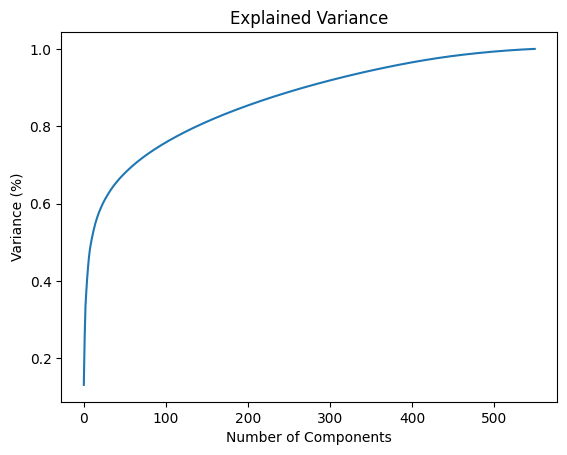

In [185]:
# Fit PCA on your preprocessed data
pca = PCA().fit(X_train_preprocessed)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/en

<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

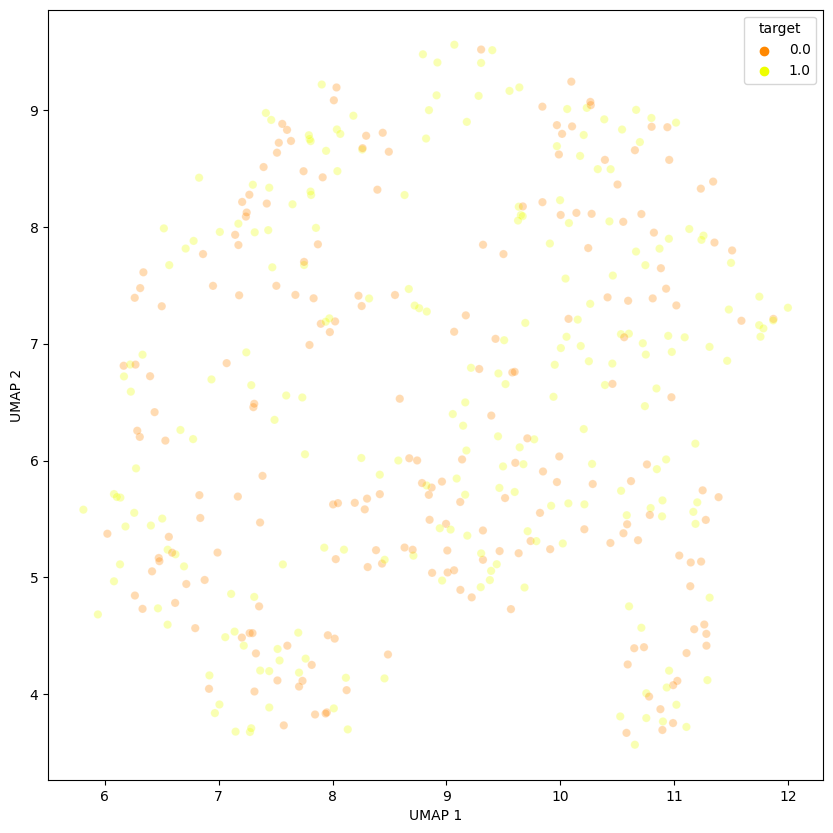

In [198]:
from umap import UMAP
import seaborn as sns

# Fit UMAP on your preprocessed data
umap = UMAP(n_components=2).fit_transform(preprocessor.transform(X_train))

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data = umap, columns = ['UMAP 1', 'UMAP 2'])

# Add target variable for coloring
umap_df['target'] = y_train

# Scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="UMAP 1", y="UMAP 2",
    hue="target",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3
)

# Now to Modeling!

In [225]:
# Define the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)


# Create and evaluate the pipeline
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model1)
                       ])

# Fit and predict
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 76.09%


In [160]:

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78        75
         1.0       0.73      0.75      0.74        63

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138

[[58 17]
 [16 47]]


In [215]:
umap = UMAP(n_components=25) # Again, choose n_components based on your requirements.

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('umap', umap),
                        ('model', model2)
                       ])

In [249]:
model2 = LogisticRegression(max_iter=1000)
pca = PCA(n_components=20)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', model2)
                       ])


In [250]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.64%


In [163]:

print(classification_report(y_test, y_pred2))

print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.52      0.43      0.47        75
         1.0       0.43      0.52      0.47        63

    accuracy                           0.47       138
   macro avg       0.48      0.48      0.47       138
weighted avg       0.48      0.47      0.47       138

[[32 43]
 [30 33]]


In [164]:
model3 = xgb.XGBClassifier()

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model3)
                       ])


In [165]:

pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.36%


In [166]:

print(classification_report(y_test, y_pred3))

print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.83      0.69      0.75        75
         1.0       0.69      0.83      0.75        63

    accuracy                           0.75       138
   macro avg       0.76      0.76      0.75       138
weighted avg       0.77      0.75      0.75       138

[[52 23]
 [11 52]]


In [167]:
from keras import regularizers
from scikeras.wrappers import KerasClassifier

In [172]:
X.shape

(688, 22738)

In [173]:
X['tissue'].value_counts()

superior temporal gyrus    177
frontal pole               173
inferior frontal gyrus     167
parahippocampal gyrus      165
prefrontal cortex            6
Name: tissue, dtype: int64

In [227]:
def create_model():
    model4 = models.Sequential()
    model4.add(layers.Dense(512, activation='relu', input_shape=(22742,)))
    model4.add(layers.Dense(256, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(128, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    return model4


In [228]:
model5 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=2)

In [231]:

pipe5 = Pipeline(steps=[('preprocessor', preprocessor),
            
                        ('model', model5)
                       ])


In [232]:
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-07-31 14:08:18.829748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


55/55 - 1s - loss: 1.0330 - acc: 0.5291 - 1s/epoch - 27ms/step
Epoch 2/50
55/55 - 1s - loss: 0.7948 - acc: 0.6018 - 562ms/epoch - 10ms/step
Epoch 3/50
55/55 - 1s - loss: 0.7341 - acc: 0.6255 - 553ms/epoch - 10ms/step
Epoch 4/50
55/55 - 1s - loss: 0.6683 - acc: 0.6545 - 550ms/epoch - 10ms/step
Epoch 5/50
55/55 - 1s - loss: 0.6179 - acc: 0.6836 - 548ms/epoch - 10ms/step
Epoch 6/50
55/55 - 1s - loss: 0.5900 - acc: 0.7200 - 555ms/epoch - 10ms/step
Epoch 7/50
55/55 - 1s - loss: 0.5371 - acc: 0.7436 - 576ms/epoch - 10ms/step
Epoch 8/50
55/55 - 1s - loss: 0.5225 - acc: 0.7418 - 566ms/epoch - 10ms/step
Epoch 9/50
55/55 - 1s - loss: 0.4192 - acc: 0.8036 - 554ms/epoch - 10ms/step
Epoch 10/50
55/55 - 1s - loss: 0.4606 - acc: 0.7836 - 559ms/epoch - 10ms/step
Epoch 11/50
55/55 - 1s - loss: 0.3903 - acc: 0.8618 - 550ms/epoch - 10ms/step
Epoch 12/50
55/55 - 1s - loss: 0.4018 - acc: 0.8236 - 541ms/epoch - 10ms/step
Epoch 13/50
55/55 - 1s - loss: 0.3238 - acc: 0.8618 - 550ms/epoch - 10ms/step
Epoch 14/

2023-07-31 14:08:48.109729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [178]:
y_pred_proba = pipe5.predict(X_test)
y_pred5 = np.where(y_pred_proba > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


14/14 - 0s - 63ms/epoch - 5ms/step
Accuracy: 55.80%


In [180]:

print(classification_report(y_test, y_pred5))

print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.61      0.51      0.55        75
         1.0       0.51      0.62      0.56        63

    accuracy                           0.56       138
   macro avg       0.56      0.56      0.56       138
weighted avg       0.57      0.56      0.56       138

[[38 37]
 [24 39]]


In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

pca = PCA(n_components=20)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters with penalty: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'sag'}
Best score with penalty: 0.7145454545454545
Best score without penalty: 0.7127272727272727


In [ ]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)

In [289]:
# Get the best parameters from the grid search
best_params = grid_search_with_penalty.best_params_

# Adjust the parameters by removing 'model__'
best_params_adjusted = {k.replace('model__', ''): v for k, v in best_params.items()}

# Fit a new model using the best parameters from the grid search
best_model = LogisticRegression(C=best_params_adjusted['C'], 
                                penalty=best_params_adjusted['penalty'], 
                                solver=best_params_adjusted['solver'], 
                                max_iter=1000)

# Create and evaluate the pipeline
pipe7 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', best_model)
                       ])

# Fit and predict
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred7))

print(confusion_matrix(y_test, y_pred7))


Accuracy: 88.19%
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       177
         1.0       0.88      0.89      0.89       187

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

[[155  22]
 [ 21 166]]


In [361]:
# Get the one-hot encoder from the preprocessor
onehot = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features = onehot.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features = numerical_cols

# Combine original and one-hot encoded feature names
feature_names = np.concatenate([original_features, onehot_features])

# Get the coefficients from the model
coefficients = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series = pd.Series(coefficients, index=feature_names)

# Get the absolute values to consider the magnitude of the coefficients
abs_coefs = coef_series.abs()

# Sort the features by the absolute values of their coefficients in descending order
sorted_features = abs_coefs.sort_values(ascending=False)

# Print the top n features
n = 50  # change this to the number of top features you want to print
print(sorted_features[:n])


ENSG00000286261    0.204817
ENSG00000261701    0.192717
ENSG00000167244    0.191943
ENSG00000286924    0.185485
ENSG00000204961    0.185455
ENSG00000170122    0.185222
ENSG00000138092    0.184943
ENSG00000203666    0.184589
ENSG00000215030    0.184014
ENSG00000242375    0.183282
ENSG00000228775    0.182926
ENSG00000136108    0.181297
ENSG00000147813    0.180748
ENSG00000286895    0.178088
ENSG00000235833    0.175515
ENSG00000043514    0.174377
ENSG00000225178    0.174373
ENSG00000124257    0.174166
ENSG00000221882    0.173115
ENSG00000154608    0.172435
ENSG00000287978    0.170843
ENSG00000189306    0.166471
ENSG00000283913    0.166303
ENSG00000243422    0.165683
ENSG00000175482    0.164736
ENSG00000105085    0.164078
ENSG00000104980    0.164026
ENSG00000234171    0.163822
ENSG00000013573    0.163094
ENSG00000233230    0.162987
ENSG00000140955    0.161093
ENSG00000266921    0.160536
ENSG00000230606    0.160415
ENSG00000244398    0.159759
ENSG00000183508    0.159514
ENSG00000204172    0

In [380]:
# Get the one-hot encoder from the preprocessor
onehot1 = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features1 = onehot1.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features1 = numerical_cols

# Combine original and one-hot encoded feature names
feature_names1 = np.concatenate([original_features1, onehot_features1])

# Get the coefficients from the model
coefficients1 = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series1 = pd.Series(coefficients1, index=feature_names)

# Sort the features by their coefficients in ascending order. The features with the most negative coefficients will come first.
sorted_features1 = coef_series1.sort_values(ascending=False)

# Print the top n features with the most negative coefficients
n = 50  # change this to the number of top features you want to print
print(sorted_features1[:n])


ENSG00000286261    0.204817
ENSG00000261701    0.192717
ENSG00000167244    0.191943
ENSG00000286924    0.185485
ENSG00000138092    0.184943
ENSG00000203666    0.184589
ENSG00000215030    0.184014
ENSG00000228775    0.182926
ENSG00000136108    0.181297
ENSG00000154608    0.172435
ENSG00000189306    0.166471
ENSG00000104980    0.164026
ENSG00000013573    0.163094
ENSG00000266921    0.160536
ENSG00000244398    0.159759
ENSG00000204172    0.159171
ENSG00000225792    0.158600
ENSG00000183793    0.158505
ENSG00000283355    0.156983
ENSG00000279168    0.156967
ENSG00000233396    0.156687
ENSG00000168743    0.156600
ENSG00000164989    0.155381
ENSG00000118004    0.154885
ENSG00000267390    0.154363
ENSG00000277494    0.151598
ENSG00000055732    0.151050
ENSG00000230409    0.149030
ENSG00000204778    0.147746
ENSG00000107371    0.146746
ENSG00000237438    0.146705
ENSG00000286532    0.146573
ENSG00000272674    0.146405
ENSG00000228506    0.145568
ENSG00000057657    0.145148
ENSG00000161217    0

In [364]:
ETG = pd.read_csv('data/RNAseqHarm/ROSMAP_Differential_Expression_(diagnosis-sex-age-death).tsv', delimiter="\t")

In [365]:
ETG.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [366]:
ETG = ETG[['ensembl_gene_id','hgnc_symbol']]

In [367]:
ETG.head()

,ensembl_gene_id,hgnc_symbol
0,ENSG00000229807,XIST
1,ENSG00000012223,LTF
2,ENSG00000197261,C6orf141
3,ENSG00000165370,GPR101
4,ENSG00000165409,TSHR


In [368]:
ETG = ETG.drop_duplicates(subset='hgnc_symbol')

In [369]:
print(sorted_features.head())
print(sorted_features.tail())

ENSG00000286261    0.204817
ENSG00000261701    0.192717
ENSG00000167244    0.191943
ENSG00000286924    0.185485
ENSG00000204961    0.185455
dtype: float64
ENSG00000105755    5.534900e-06
ENSG00000131373    4.117544e-06
ENSG00000183513    3.445964e-06
ENSG00000121067    1.086228e-06
ENSG00000181915    9.819897e-07
dtype: float64


In [370]:
# Reset the index of sorted_features
sorted_features = sorted_features.reset_index()

In [371]:
# Rename the columns of sorted_features for the merge operation
sorted_features.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df = pd.merge(sorted_features, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df.set_index('hgnc_symbol', inplace=True)

# Select the top n features
top_features = merged_df['coef'].head()


In [343]:
print(ETG['ensembl_gene_id'].nunique())
print(ETG.shape[0])


18852
18852


In [372]:
top_features

hgnc_symbol
AC022137.3    0.204817
HPR           0.192717
IGF2          0.191943
AL139815.1    0.185485
PCDHA9        0.185455
Name: coef, dtype: float64

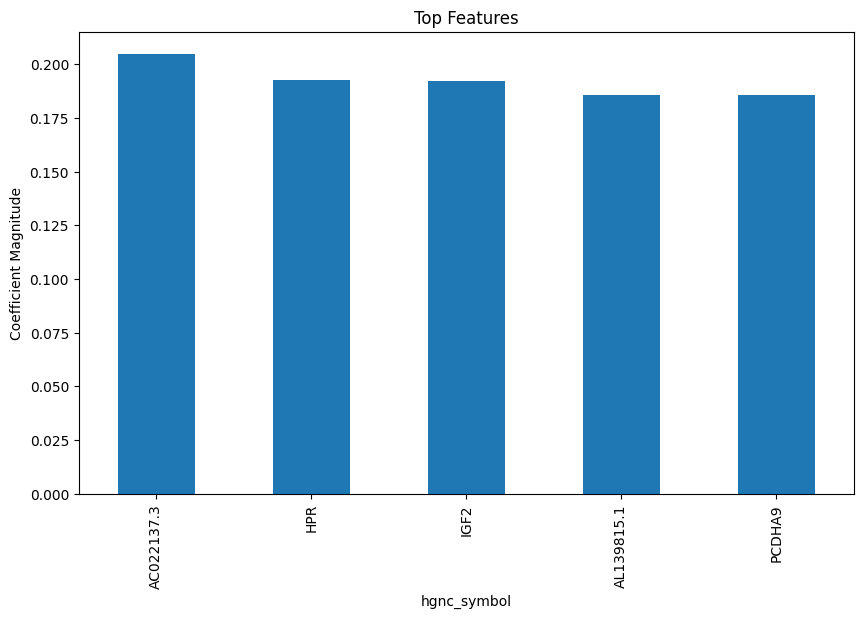

In [345]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))  # adjust the size of the figure as needed
top_features.plot(kind='bar')
plt.title('Top Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


In [357]:
# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list
top_features1 = top_features

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features1[gene] = coef  # add the gene and its coefficient to the top_features


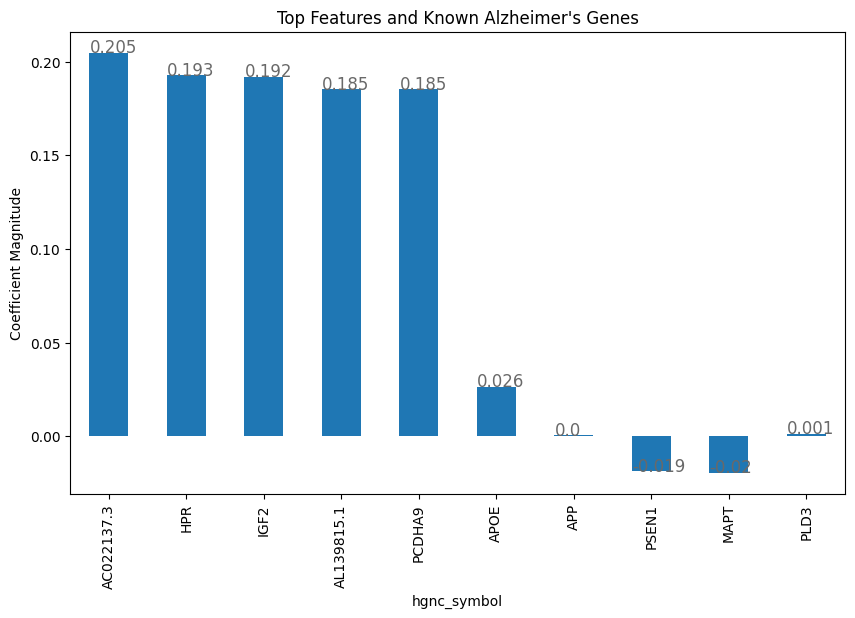

In [359]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))  # adjust the size of the figure as needed
top1_features.plot(kind='bar', ax=ax)
plt.title('Top Features and Known Alzheimer\'s Genes')
plt.ylabel('Coefficient Magnitude')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    
plt.show()


In [382]:
sorted_features1_df = sorted_features1.reset_index()

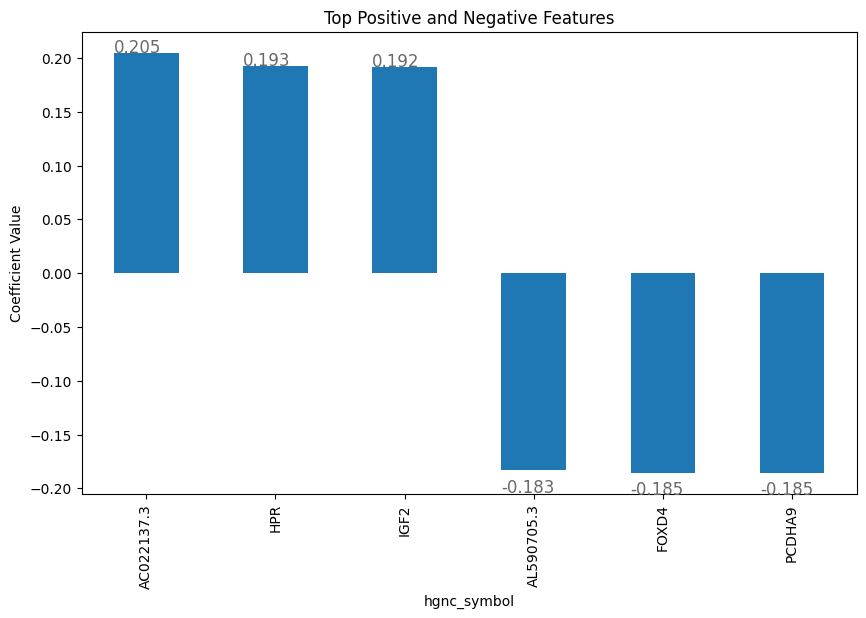

In [390]:
# Convert Series to DataFrame
coef_series_sorted_df = coef_series_sorted.reset_index()

# Rename the columns of sorted_features_df for the merge operation
coef_series_sorted_df.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df1 = pd.merge(coef_series_sorted_df, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df1.set_index('hgnc_symbol', inplace=True)

# Get the top n positive features and top n negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 6))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive and Negative Features')
plt.ylabel('Coefficient Value')
plt.show()


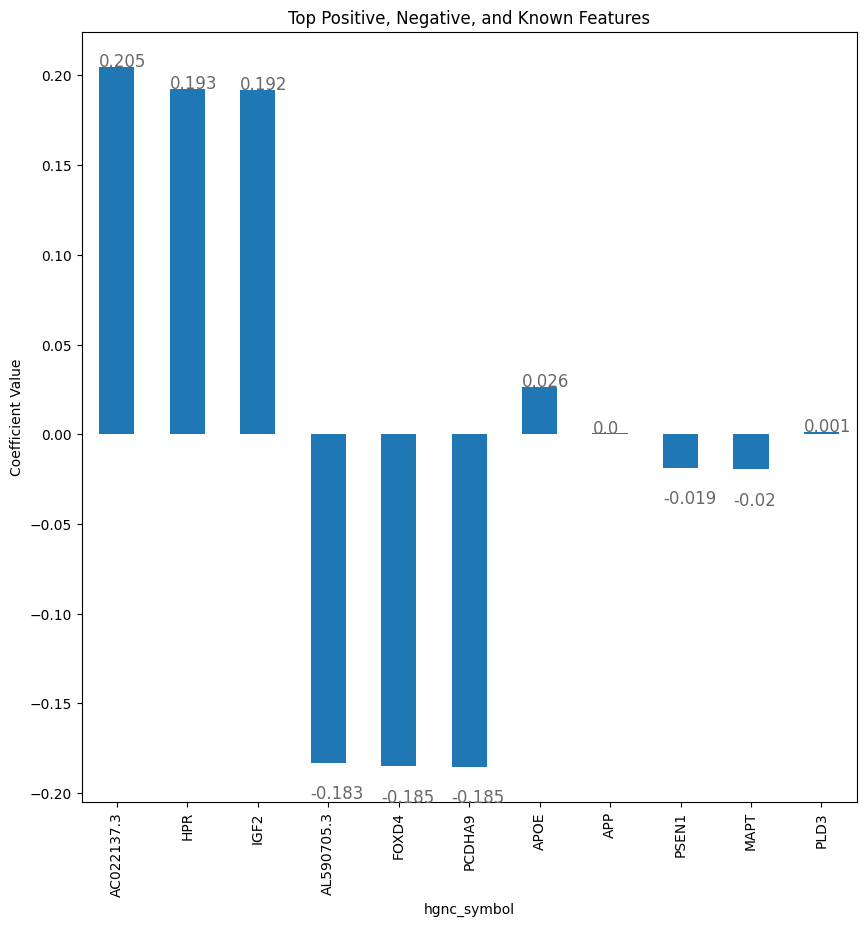

In [396]:
# Get the top 2 positive features and top 2 negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features2[gene] = coef  # add the gene and its coefficient to the top_features2

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 10))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive, Negative, and Known Features')
plt.ylabel('Coefficient Value')
plt.show()


In [374]:
ls1 = df.columns.tolist()

In [376]:
print(ls1)

['feature', '510_120515', '207_120424', '81_120417', '649_120529', '487_120515', '182_120424', '193_120424', '694_120605', '366_120502', '52_120416', '522_120515', '493_120515', '602_120523', '634_120524', '653_120529', '391_120503', '453_120507', '371_120502', '414_120503', '102_120418', '641_120524', '111_120418', '600_120523', '188_120424', '321_120501', '547_120516', '130_120419', '305_120430', '668_120530', '555_120517', '679_120604', '318_120501', '112_120418', '689_120604', '418_120507', '589_120522', '216_120425', '654_120529', '619_120524', '358_120502', '312_120430', '624_120524', '576_120521', '410_120503', '274_120430', '408_120503', '76_120417', '340_120501', '288_120430', '222_120425', '234_120425', '578_120521', '46_120416', '477_120514', '683_120604', '39_120416', '309_120430', '121_120418', '405_120503', '482_120514', '607_120523', '565_120517', '120_120418', '507_120515', '260_120426', '273_120430', '524_120515', '556_120517', '113_120418', '160_120423', '698_120605',